# Kernelized Support Vector Machines

Mathmatical process of SVM is excluded in this note. I will just see some idea of SVM.

## Linear model and feature of Non-linear.

In [1]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'Feature 1')

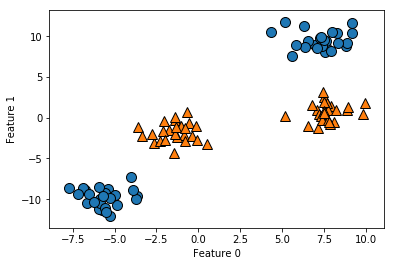

In [2]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

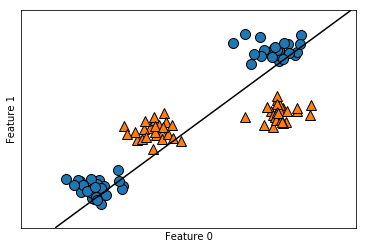

In [3]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

This dataset doens't suit well with Linear Classification model.

So, By adding one more feature using existing feature, it can be expanded to 3-dimensions data point.


Text(0.5,0,'Feature1^2')

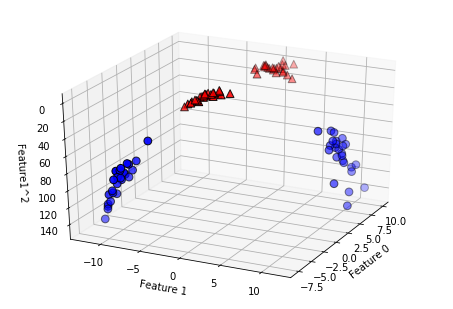

In [4]:
X_new = np.hstack([X, X[:, 1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature1^2")

Then, it can be possible to classify two classes with plane

## Kernel

In [5]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)

Text(0,0.5,'Feature 1')

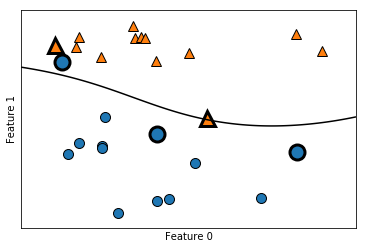

In [6]:
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

#Support Vector
sv = svm.support_vectors_

sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Marked icons are support vector and SVM draw non-linear boundary.

## Parameters (C, gamma)

gamma is reciprocal number of gaussian kernel width. It define level of effect on one training sample.

C is parameter for regularization.

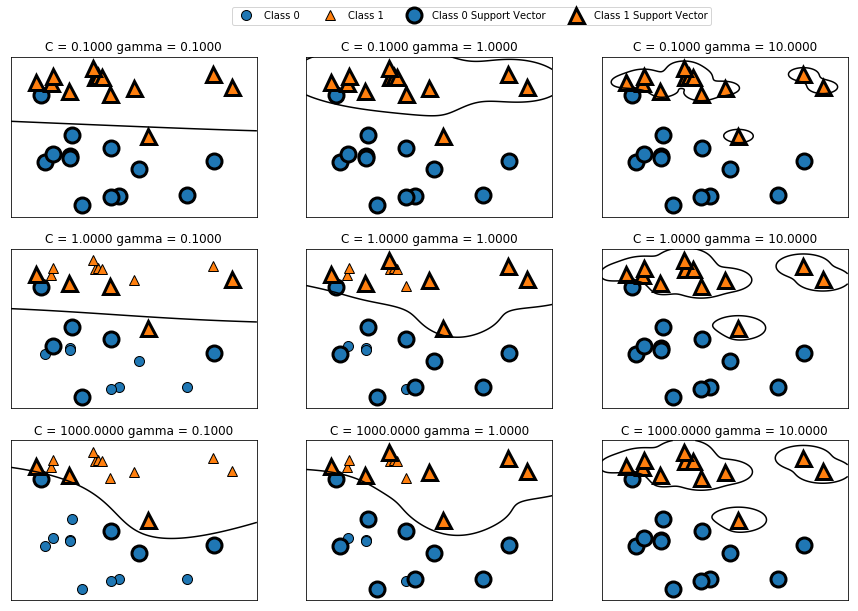

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["Class 0", "Class 1", "Class 0 Support Vector", "Class 1 Support Vector"], ncol=4, loc=(.9, 1.2))

#### gamma

- Small value of gamma makes decision boundary change slowly, It lower model's complexity.

- Big value of gamma makes more complex model.

#### C

- Small value of C makes very regularized model.

- Too big value of C makes model overfitted.

## Preprocessing for SVM

SVM is highly effected with scale of dataset.

In Kernel SVM, Normalization is commonly used.

## Summary

Kernel Support Vector Machines is very strong model, and works well on various dataset.

It doesn't matter that whether dataset has Low or High dimension,

But It doesn't work well with dataset which has more than 100,000 samples.(10,000 is suitable.)

And to use this, we have to carefully select parameter value and care about data scale. SVM is quite sensitive to those problems.